# Film Jamz

Jingyi, Aidan, Micheal, Zhimin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

Load the data from csv file. It contains 6820 records. Each record has these values:

**Response Variable：**
* Default or Not      

**Predictor Variables:**
1. company: the production company   
2. country: country of origin                  
3. director: the director   
4. genre: main genre of the movie                          
5. gross: revenue of the movie                 
6. name: name of the movie       
7. rating: rating of the movie              
8. runtime: duration of the movie           
9. score: IMDb user rating    
10. votes: number of user votes

The goal of this project is to build an analyzing modle for potential investors in movie industry to indicate which feature will most likely be the key to success for future movies.

In [2]:
import pandas as pd
df=pd.read_csv('data/movies.csv')
#print list(df.columns.values)
#print df.info() # basic information
#print data.describe() # basic statistics
df.head()



,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer
0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,89,8.1,Wil Wheaton,299174,Stephen King
1,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,103,7.8,Matthew Broderick,264740,John Hughes
2,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,110,6.9,Tom Cruise,236909,Jim Cash
3,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,137,8.4,Sigourney Weaver,540152,James Cameron
4,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,90,6.9,Joey Cramer,36636,Mark H. Baker


## Missing value:

Replace all nan values as mean values.

In [3]:
from sklearn import preprocessing
from sklearn import utils
#numric the strings(replace unique string with a unique number)
le = preprocessing.LabelEncoder()
df['company'] = le.fit_transform(df['company'])
df['country'] = le.fit_transform(df['country'])
df['director'] = le.fit_transform(df['director'])
df['name'] = le.fit_transform(df['name'])
df['rating'] = le.fit_transform(df['rating'])
df['star'] = le.fit_transform(df['star'])
df['writer'] = le.fit_transform(df['writer'])
df['genre'] = le.fit_transform(df['genre'])

y=df.iloc[:,4].fillna(df.mean()).as_matrix()
x=df.iloc[:, 0:].fillna(df.mean()).as_matrix()
x = np.delete(x, 4, axis = 1)
y = y.astype('int')

print y.shape
print x.shape

x = preprocessing.StandardScaler().fit_transform(x)
df.head()

(6820,)
(6820, 11)


,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer
0,665,54,2192,1,52287414,4661,8,89,8.1,2454,299174,3716
1,1680,54,1296,4,70136369,1821,7,103,7.8,1605,264740,1970
2,1680,54,2645,0,179800601,6203,6,110,6.9,2345,236909,1852
3,2062,54,1066,0,85160248,295,8,137,8.4,2192,540152,1629
4,2122,54,2123,1,18564613,1872,6,90,6.9,1139,36636,2549


In [4]:
#use Random Forest Regressor as the algrithm
from sklearn.ensemble import RandomForestRegressor
# Logistic Classification
regressify = RandomForestRegressor() # You can adjust some paraments here.
regressify.fit(x,y)

y_pred = regressify.predict(x)
regressif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
print("regressif_rate for %s : %f " % ('RandomForestRegressor', regressif_rate))
print regressify.feature_importances_


regressif_rate for RandomForestRegressor : 1.143695 
[ 0.02811235  0.01967499  0.03517509  0.03622876  0.03974397  0.11755431
  0.04651656  0.05223342  0.03315381  0.56196297  0.02964378]


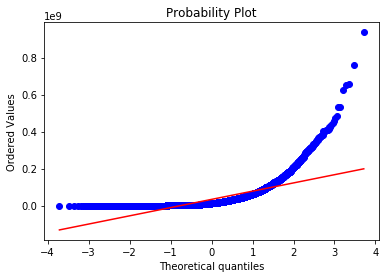

In [5]:
from scipy.stats import probplot
def qq_plot(x):
    probplot(x, dist='norm', plot=plt)
x=df['gross']
qq_plot(x)

In [6]:
from scipy.stats.kde import gaussian_kde
def kde_plot(x):   
    kde = gaussian_kde(x)
    positions = np.linspace(x.min(), x.max())
    smoothed = kde(positions)
    plt.plot(positions, smoothed)
    
def kde_values(x):   
    kde = gaussian_kde(x)
    positions = np.linspace(x.min(), x.max())
    smoothed = kde(positions)
    return positions, smoothed

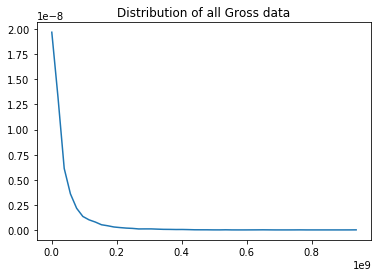

In [7]:
dis=df['gross']
dis=dis.dropna()
kde_plot(dis)
plt.title("Distribution of all Gross data")
plt.show()

In [8]:
averagegross = 0
count = 0
for i in df['gross']:
    averagegross += i
    count += 1
averagegross = averagegross/count
print averagegross

33497828


In [9]:
print x.quantile(0.99), x.quantile(0.01)

291948708.33 6024.4


<function matplotlib.pyplot.show>

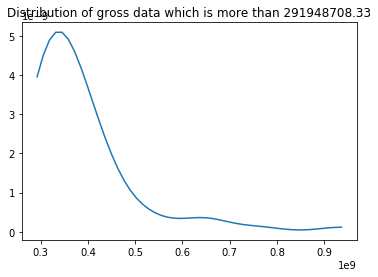

In [10]:
kde_plot(x[x>291948708.33])
plt.title("Distribution of gross data which is more than 291948708.33")
plt.show

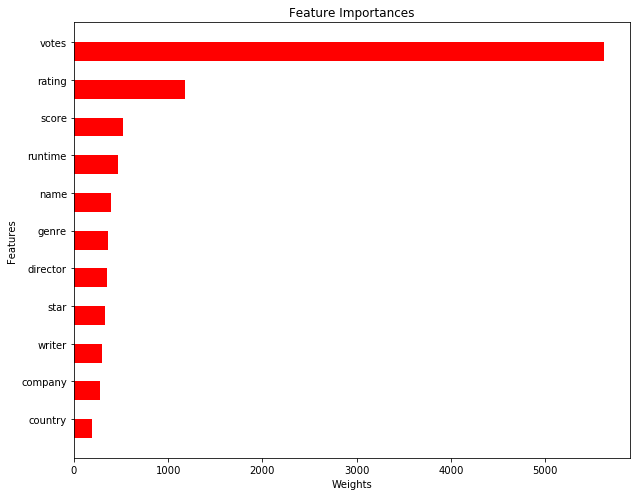

In [11]:
#importance of feature
features=np.array([ "company",
                    "country",
                    "director",
                    "genre",
                    
                    "name",
                    "rating",
                    "runtime",
                    "score",
                    "star",
                    "votes",
                    "writer"
                    ])

new = [i * 10000 for i in regressify.feature_importances_]

#print new
ind=sorted(range(len(new)),reverse=False,key=lambda k: new[k])
features=features[ind]

new = sorted(new,reverse=False)
ind=np.array(range(11))
#print ind
plt.rcParams['figure.figsize'] = (9,7)
plt.barh(bottom=ind,height=0.5,width=new,color='r')
plt.yticks(ind+0.25,features)
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Feature Importances')
#plt.subplots_adjust(left=0.2)
plt.tight_layout()
#plt.savefig('feature_importances.png', format='png', dpi=300)
plt.show()

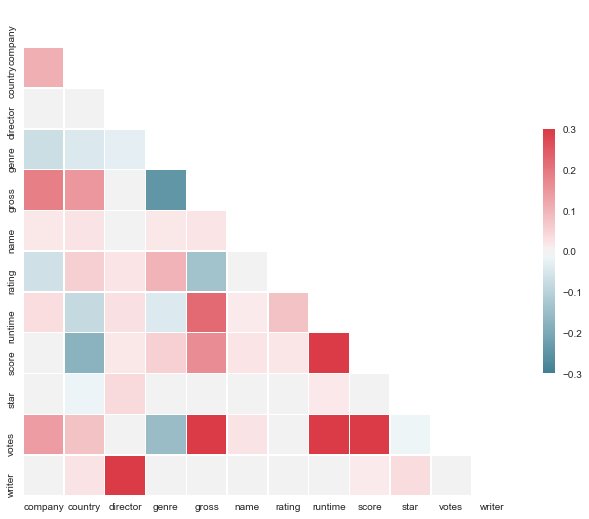

In [12]:
# A diagonal correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
import string
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='zjy0955', api_key='0NuYXfVAZFO4oArxAX7g')
N = 1
y_vals = {}
for letter in list(string.ascii_uppercase):
     y_vals[letter] = np.random.randn(N)+(3*np.random.randn())
        


data = []
print df.columns
for col in df.columns:
    if(col != 'gross'):
        data.append(  go.Box( y=df[col], name=col, showlegend=False ) )

data.append( go.Scatter( x = df.columns, y = df.mean(), mode='lines', name='mean' ) )

# IPython notebook
# py.iplot(data, filename='pandas-box-plot')

url = py.plot(data, filename='pandas-box-plot')

Index([u'company', u'country', u'director', u'genre', u'gross', u'name',
       u'rating', u'runtime', u'score', u'star', u'votes', u'writer'],
      dtype='object')
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~zjy0955/0 or inside your plot.ly account where it is named 'pandas-box-plot'


In [14]:
#5 algorithms
y=df.iloc[:,0].fillna(df.mean()).as_matrix()
x=df.iloc[:,1:].fillna(df.mean()).as_matrix()
print y.shape
print x.shape

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
tuned_parameters = {'criterion':["mse","friedman_mse", "mae"]}
model = GridSearchCV(model,tuned_parameters,cv=2,verbose=1)
model.fit(x,y)
print model.best_params_
print abs(model.best_score_)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
tuned_parameters = {'n_estimators':[10,20], 'max_depth':[None, 3]}
model = GridSearchCV(model,tuned_parameters,cv=2,verbose=1)
model.fit(x,y)
print model.best_params_
print model.best_score_ 

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor() 
tuned_parameters = {'n_estimators':[100,50], 'max_depth':[2, 3]}
model.fit(x,y)
model = GridSearchCV(model,tuned_parameters,cv=2,verbose=1)
model.fit(x,y)
print model.best_params_
print model.best_score_ 

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor() 
tuned_parameters = {'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute']}
model.fit(x,y)
model = GridSearchCV(model,tuned_parameters,cv=2,verbose=1)
model.fit(x,y)
print model.best_params_
print abs(model.best_score_)

from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor() 
tuned_parameters = {'n_estimators':[10,50,100], 'learning_rate':[0.5,1.0]}
model.fit(x,y)
model = GridSearchCV(model,tuned_parameters,cv=2,verbose=1)
model.fit(x,y)
print model.best_params_
print abs(model.best_score_)



(6820,)
(6820, 11)
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.3s finished


{'criterion': 'mse'}
0.89008075347
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.8s finished


{'n_estimators': 20, 'max_depth': 3}
0.0429633046836
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.7s finished


{'n_estimators': 50, 'max_depth': 2}
0.0373003695718
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.4s finished


{'weights': 'uniform', 'algorithm': 'ball_tree'}
0.155206988368
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.9s finished


{'n_estimators': 10, 'learning_rate': 0.5}
0.0433811535712


In [15]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

models = [DecisionTreeRegressor(), 
          RandomForestRegressor(), 
          GradientBoostingRegressor(),
          KNeighborsRegressor(),
          AdaBoostRegressor()
          ]
tuned_parameters = [{'criterion':["mse","friedman_mse", "mae"]},  # parameters for decision tree
                    {'n_estimators':[10,20], 'max_depth':[None, 3]}, # parameters for random forest
                   {'n_estimators':[100,50], 'max_depth':[2, 3]}, # parameters for gradient boosting
                    {'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute']},
                   {'n_estimators':[10,50,100], 'learning_rate':[0.5,1.0]}]

# Higher score means a better model
for model, tuned_parameter in zip(models, tuned_parameters):
    regressify = GridSearchCV(model,tuned_parameter,cv=5,verbose=1)
    regressify.fit(x,y)
    print regressify.best_params_
    print regressify.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   25.5s finished


{'criterion': 'friedman_mse'}
-0.883042362421
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    9.6s finished


{'n_estimators': 10, 'max_depth': 3}
0.0510176667949
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.6s finished


{'n_estimators': 50, 'max_depth': 2}
0.0524000161601
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   27.5s finished


{'weights': 'distance', 'algorithm': 'ball_tree'}
-0.139150282987
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_estimators': 10, 'learning_rate': 0.5}
0.0463487731635


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.6s finished


In [16]:
#r2 score
from sklearn.metrics import r2_score

#lb = preprocessing.LabelBinarizer()
#lb.fit(yhat)
#classify = GradientBoostingRegressor(n_estimators = 100, max_depth = 3)
classify = RandomForestRegressor(criterion = 'mse')
#classify = DecisionTreeRegressor(criterion = 'friedman_mse')
#classify = AdaBoostRegressor(n_estimators = 100, learning_rate = 1.0)
classify.fit(x,y)
yhat=classify.predict(x)
#print y
#print yhat
print r2_score(y,yhat) 
yroc = y
#make the target to binary 
average = 0
total = 0
for i in range(len(yroc)):
    total += yroc[i]
average = total/len(yroc)
#print average

for i in range(len(yroc)):
    if(yroc[i] >= average):
        yroc[i] = 1
    elif(yroc[i] < average):
        yroc[i] = 0
   
#print y

0.817069914308


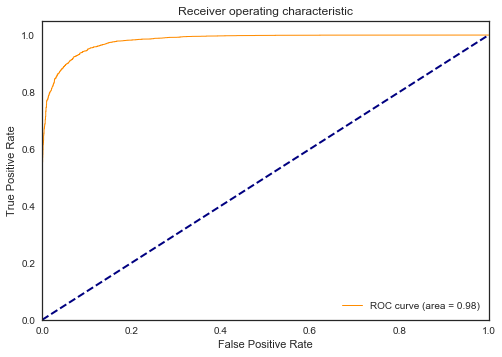

In [17]:
#ROC Area
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(yroc, yhat)
roc_auc = auc(fpr, tpr)
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
